<a href="https://colab.research.google.com/github/Jahnavi110125/Diabetes_Prediction/blob/main/Project_DT_RT_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML Practice/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df1=df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df=df.drop(['Pregnancies'], axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
x=df.iloc[:,0:7].values
y=df.iloc[:,7].values

In [ ]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
clf=DecisionTreeClassifier(max_depth=3)

In [ ]:
clf=clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
acc= metrics.accuracy_score(y_test, y_pred)*100
print(f'Accuracy with Decision Tree: {acc:.2f}')


Accuracy with Decision Tree: 78.57


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
y_pred_r = rf_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred_r)
print(f'Accuracy with Random Forest: {accuracy:.2f}')

Accuracy with Random Forest: 0.80


In [ ]:
print(metrics.classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



[Text(0.5, 0.875, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'Age <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.125, 0.375, 'BMI <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.0625, 0.125, 'gini = 0.147\nsamples = 213\nvalue = [196, 17]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.375, 'Glucose <= 99.5\ngini = 0.435\nsamples = 172\nvalue = [117, 55]'),
 Text(0.3125, 0.125, 'gini = 0.187\nsamples = 48\nvalue = [43, 5]'),
 Text(0.4375, 0.125, 'gini = 0.481\nsamples = 124\nvalue = [74, 50]'),
 Text(0.75, 0.625, 'BMI <= 29.95\ngini = 0.474\nsamples = 225\nvalue = [87, 138]'),
 Text(0.625, 0.375, 'Glucose <= 145.5\ngini = 0.458\nsamples = 62\nvalue = [40, 22]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.6875, 0.125, 'gini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(0.875, 0.375, 'Glucose <= 154.5\ngini = 0.41\nsamples = 163\nv

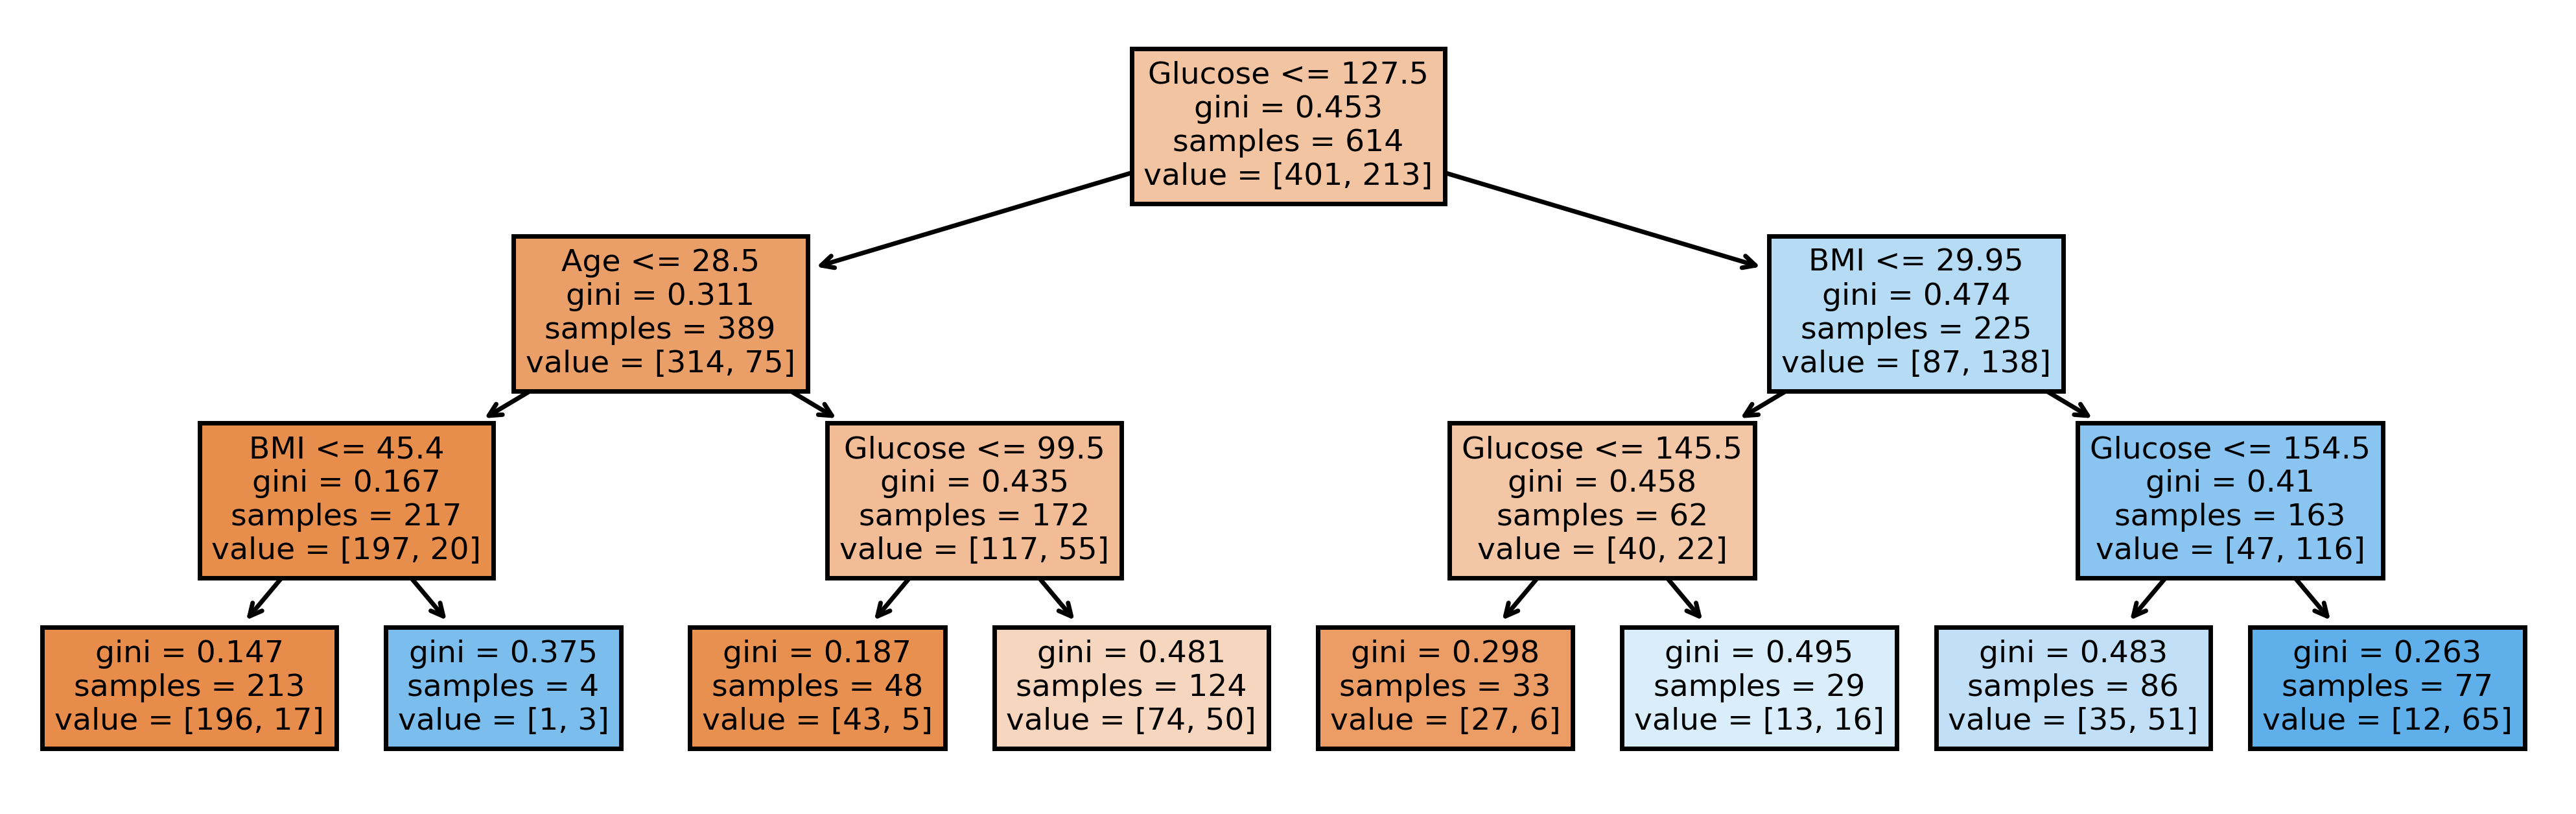

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3), dpi=500)
from sklearn.tree import plot_tree
plot_tree(clf,feature_names=df.columns,filled=True)